<h2>Asg2 test</h2>

In [25]:
from asg1_2 import ascii_by_pca

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image, ImageDraw, ImageFont

In [27]:
l1_norm = lambda array1, array2: np.sum(np.abs(array1 - array2))
l2_norm = lambda array1, array2: np.sqrt(np.sum((array1 - array2) ** 2))

In [28]:
new_width = 160
path = "./frame_000013.png"
pca_components = 20
font_path = "path/to/arial.ttf"
style = font_path.rsplit("/",1)[-1]
output_name = path.rsplit(".",1)[0]

In [29]:
img_path = path
img = cv.imread(img_path,cv.IMREAD_GRAYSCALE)
new_size = (3200, 1800)
img = cv.resize(img, new_size, interpolation=cv.INTER_AREA)
print(f"Real Shape of Img: {img.shape}")
height, width = img.shape
tile = width//new_width
print(f"Scaled Ratio of the IMG: {tile}")
C = width // tile
R = height // tile
print(f"Dimension of New IMG: {R} x {C}")
print(f"Patch size Dimension: {tile} X {tile}")

Real Shape of Img: (1800, 3200)
Scaled Ratio of the IMG: 20
Dimension of New IMG: 90 x 160
Patch size Dimension: 20 X 20


In [30]:
def pca_get(img, n = 5):
    pca = PCA(n_components=min(n, min(img.shape)))
    pca_result = pca.fit_transform(img)
    return pca_result.flatten()

In [31]:
def char2img (text, N=10):
    # Step 1: Create a blank image with black background
    image_size = (N, N)  # N x N image
    img = Image.new('L', image_size, color=0)  # 'L' mode for grayscale, background color black (0)
    
    # Step 2: Load Courier font
    try:
        font = ImageFont.truetype(style, size=N*0.9)  # Adjust font size to fit the image (font-size = N*0.90)
    except IOError:
        print(f"{style} font not found! Using default font.")
        font = ImageFont.load_default()
    
    # Step 3: Draw the letter on the image
    draw = ImageDraw.Draw(img)
    text_bbox = draw.textbbox((0, 0), text, font=font)  # Get the bounding box of the text
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Center the text in the image
    text_x = (image_size[0] - text_width) // 2
    text_y = (image_size[1] - text_height) // 2
    
    # Move the text a little up
    offset = -(N*0.15)  # Negative value moves the text up
    text_y += offset
    
    draw.text((text_x, text_y), text, fill=255, font=font)  # Fill color white (255)
    
    # Step 4: Convert to NumPy array and display
    img_array = np.array(img)
    # plt.imshow(img_array, cmap="gray")
    # plt.axis("off")
    # plt.show()
    
    return img_array

In [32]:
def ascii_prepare(tile):
    ascii_chars_1 = ''.join(chr(i) for i in range(32,126))
    ascii_chars_2 = ''.join(chr(i) for i in range(161,323))
    ascii_chars_full = ascii_chars_1 + ascii_chars_2
    print(ascii_chars_full)
    
    pca_dataset = []
    for i in ascii_chars_full:
        pca_result = pca_get(char2img(i,tile), pca_components)
        pca_dataset.append([i, pca_result])
    return pca_dataset

In [33]:
def patch2ascii(img, n=5):
    global ascii_dataset
    # ascii_dataset = ascii_dataset

    patch_pca = pca_get(img, n)

    max_len = max(patch_pca.shape[0], ascii_dataset[0][1].shape[0])

    if patch_pca.shape[0] != ascii_dataset[0][1].shape[0]:
        # Pad both arrays with zeros to match the maximum length
        patch_pca = np.pad(patch_pca, (0, max_len - patch_pca.shape[0]), mode='constant')
        # padded_ascii = np.pad(ascii_dataset[0][1], (0, max_len - ascii_dataset[0][1].shape[0]), mode='constant')

    limit = len(ascii_dataset)

    min_l2 = 99999
    min_l2_position = 0 #limit-1

    for i in range(limit):
        l2 = l1_norm(patch_pca, ascii_dataset[i][1])
        if l2 < min_l2:
            min_l2 = l2
            min_l2_position = i

    return ascii_dataset[min_l2_position][0]

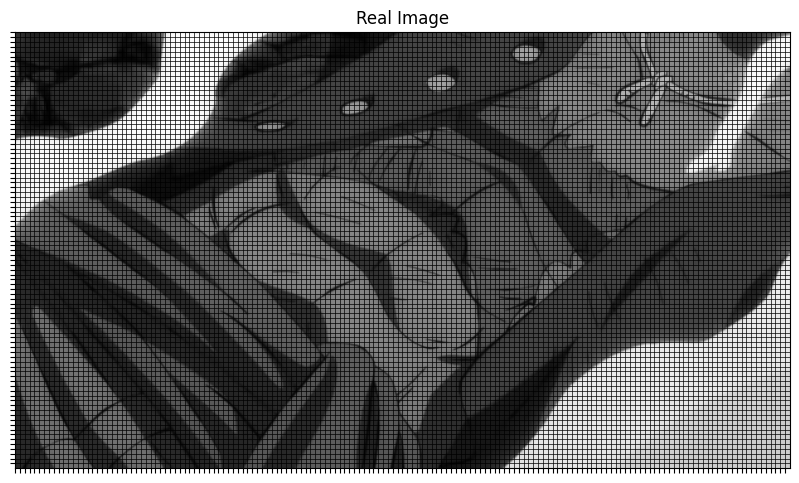

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿĀāĂăĄąĆćĈĉĊċČčĎďĐđĒēĔĕĖėĘęĚěĜĝĞğĠġĢģĤĥĦħĨĩĪīĬĭĮįİıĲĳĴĵĶķĸĹĺĻļĽľĿŀŁł


c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


PCA_n: 20, font_path: path/to/arial.ttf, style: arial.ttf, output_name: ./frame_000013


In [34]:
if img is not None:
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=1)
    # Set grid intervals (spacing for grid lines)
    plt.xticks(range(0, img.shape[1], tile))  # Vertical lines
    plt.yticks(range(0, img.shape[0], tile))  # Horizontal lines
    plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
    plt.title("Real Image")
    plt.show()

ascii_dataset = ascii_prepare(tile)

print(f"PCA_n: {pca_components}, font_path: {font_path}, style: {style}, output_name: {output_name}")

In [38]:
# Load the text file
def load_text( file_path = None):
    with open(file_path, "r") as file:
        return [line.rstrip("\n") for line in file]
        
    # Convert text to image
def text_to_image( text_lines=None, image_path=None, font_size=0, image_size=None):
    global output_file, font_path, height, width
    if text_lines == None:
        text_lines = load_text(output_file)

    if image_path == None:
        path_name = output_file.rsplit(".",1)[0]
        font_name = style
        image_path = f'{path_name}_L1_text2img.png'
    
    # if font_path == None:
    #     font_path = font_path
    if font_size == 0:
        font_size = tile

    if image_size == None:
        image_size = (width, height)
    
    # print(f"text = {text_lines}, font = {font_size},font_path = {font_path}, size = {image_size}")
    # Image dimensions
    width, height = image_size
    cell_width = width // 160
    cell_height = height // 139
    # Create an empty white image
    img = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(img)

    # Set the font to Courier
    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.truetype("cour.ttf", font_size)  # Use Courier by default

    # Draw characters on the image
    for i, line in enumerate(text_lines):
        for j, char in enumerate(line):
            x = j * cell_width
            y = i * cell_height
            draw.text((x, y), char, fill="white", font=font)

    # Save the image
    img.save(image_path)
    print(f"Image saved at {image_path}")

In [36]:
# def img2ascii_file():
#     global output_file
file_out_path = f'{output_name}_pca_{pca_components}_L1_{style}.txt'
print(f"name= {file_out_path}")
output_file = file_out_path
with open(file_out_path, 'w', encoding='utf-8') as file:
    file.write('Hello, world!\n')
    for i in range(0, height, tile):
        for j in range(0, width, tile):
            char = patch2ascii(img[i:(i+tile), j:(j+tile)], pca_components)  # Get the tile section
            file.write(char)
        file.write("\n")

print(f"{file_out_path} created successfully!!")

name= ./frame_000013_pca_20_L1_arial.ttf.txt


c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value enco

./frame_000013_pca_20_L1_arial.ttf.txt created successfully!!


c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\acer\Desktop\HW\CV\asg1_ascii_art\.venv\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value enco

In [39]:
text_to_image()

Image saved at ./frame_000013_pca_20_L1_arial.ttf_L1_text2img.png


In [108]:
ascii_chars_1 = ''.join(chr(i) for i in range(32,126))
ascii_chars_2 = ''.join(chr(i) for i in range(161,323))
ascii_chars_full = ascii_chars_1 + ascii_chars_2
print(ascii_chars_full)
    
pca_dataset = []
# for i in ascii_chars_full:
#     pca_result = pca_get(char2img(i,tile), pca_components)
#     pca_dataset.append([i, pca_result])

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿĀāĂăĄąĆćĈĉĊċČčĎďĐđĒēĔĕĖėĘęĚěĜĝĞğĠġĢģĤĥĦħĨĩĪīĬĭĮįİıĲĳĴĵĶķĸĹĺĻļĽľĿŀŁł


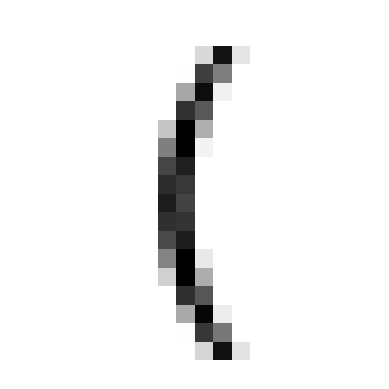

In [194]:
x = char2img(ascii_chars_full[8],20)

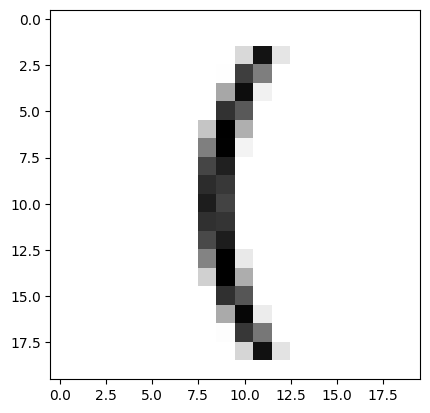

In [ ]:
pca = PCA(n_components=5)
transformed = pca.fit_transform(x)
reconstructed = pca.inverse_transform(transformed)

plt.imshow(reconstructed, cmap="gray")
plt.axis("on")
plt.show()

In [203]:
l2_norm(x,reconstructed)

np.float64(5.155231163830949e-13)

In [204]:
l1_norm(x,reconstructed)

np.float64(4.035882739117369e-12)